In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy.ndimage import distance_transform_edt

import kagglehub

In [23]:
path = kagglehub.dataset_download(
    "mahmudulhasantasin/data-science-bowl-2018-competition-merged-mask"
)

DATASET_PATH = f"{path}/data science bowl 2018/stage1_train 2"

In [24]:
def build_merged_mask(mask_dir, shape):

    merged_mask = np.zeros(shape, dtype=np.uint8)

    for file in os.listdir(mask_dir):

        mask = cv2.imread(os.path.join(mask_dir, file), 0)

        if mask is not None:
            merged_mask = np.maximum(merged_mask, mask)

    return (merged_mask > 0).astype(np.uint8)

In [25]:
def marker_watershed(distance, mask, min_distance=8):   

    coords = peak_local_max(distance,
                            min_distance=min_distance,
                            labels=mask)

    markers = np.zeros(distance.shape, dtype=int)

    for i, (r, c) in enumerate(coords):
        markers[r, c] = i + 1

    labels = watershed(-distance, markers, mask=mask)

    return labels


Image 1
Ground Truth Nuclei: 10
Watershed Count: 9


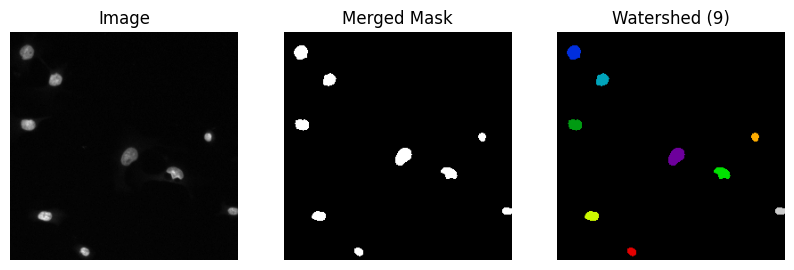


Image 2
Ground Truth Nuclei: 24
Watershed Count: 17


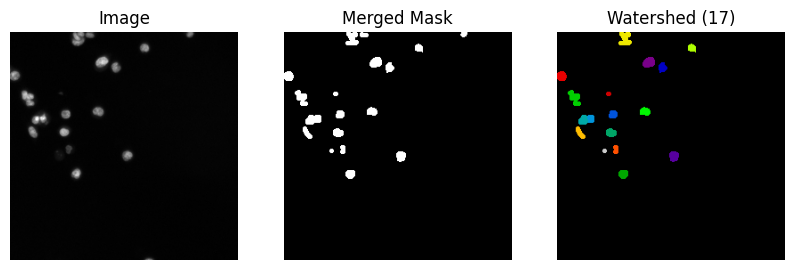


Image 3
Ground Truth Nuclei: 10
Watershed Count: 9


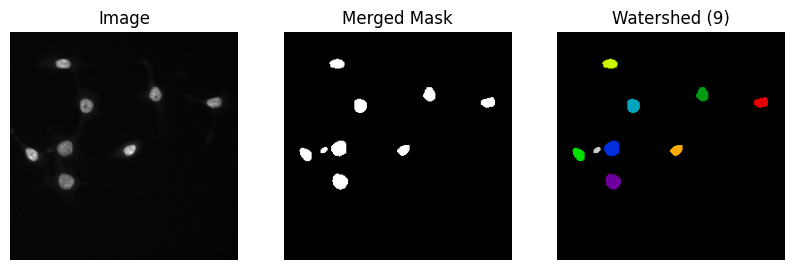

In [26]:
MAX_IMAGES = 3
count = 0

for folder in os.listdir(DATASET_PATH):

    if count >= MAX_IMAGES:
        break

    sample_path = os.path.join(DATASET_PATH, folder)

    img_dir  = os.path.join(sample_path, "images")
    mask_dir = os.path.join(sample_path, "masks")

    img_file = os.listdir(img_dir)[0]
    image = cv2.imread(os.path.join(img_dir, img_file))
    gray  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    merged_mask = build_merged_mask(mask_dir, gray.shape)

    gt_count = len(os.listdir(mask_dir))

    print(f"\nImage {count+1}")
    print("Ground Truth Nuclei:", gt_count)

    distance = distance_transform_edt(merged_mask)

    labels = marker_watershed(distance, merged_mask, min_distance=8)  
    print("Watershed Count:", labels.max())

    plt.figure(figsize=(10,4))

    plt.subplot(1,3,1)
    plt.title("Image")
    plt.imshow(gray, cmap='gray')
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.title("Merged Mask")
    plt.imshow(merged_mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.title(f"Watershed ({labels.max()})")
    plt.imshow(labels, cmap='nipy_spectral')
    plt.axis("off")

    plt.show()

    count += 1